# 1. Import CSV

In [71]:
import pandas as pd

df = pd.read_csv('annote_yidi.csv')


print(df)


    GOLD EI NS FT PJ                                           vacances   
0   INFP  I  N  F  P  J'aime beaucoup voyager (que cela soit en Fran...  \
1   ENFP  E  N  F  P  Je préfère les voyages de vacances non planifi...   
2   INTJ  I  N  T  P  aller dans des endroits / lieux visuellement b...   
3   INFJ  E  N  F  P  Partir dans un endroit que je ne connais pas, ...   
4   INTP  I  N  T  P  Mon type de vacances préféré est lorsque je re...   
..   ... .. .. .. ..                                                ...   
60  ESTJ  E  S  T  J  Sortir avec des amis qui forment une équipe bi...   
61  ENFJ  I  N  F  P  J’aime bien trouver des lieux pas très populai...   
62  ISTP  E  S  F  P  J’aime bien les vacances chills. J’aime bien a...   
63  ISTJ  I  S  T  J  Si j'ai plus ou moins un mois pour les vacance...   
64  INFP  I  N  F  P  Partir en vacances avec quelques amis, dans un...   

                                          passe-temps  
0   J'aime beaucoup écrire, apprendre des l

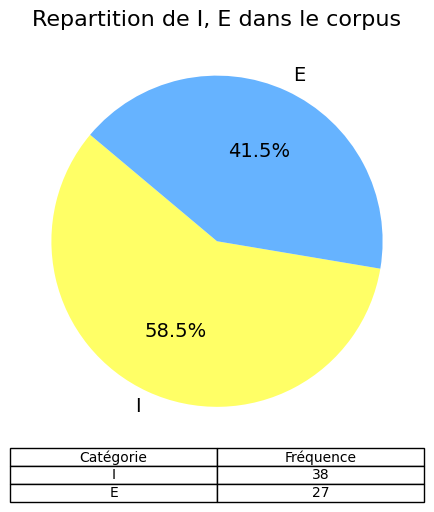

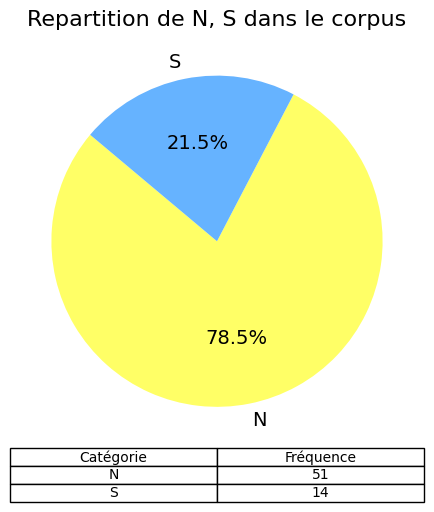

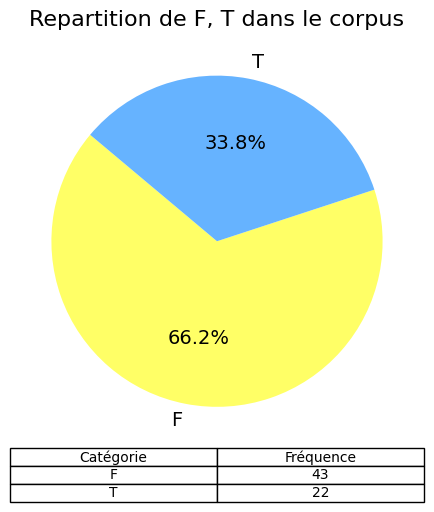

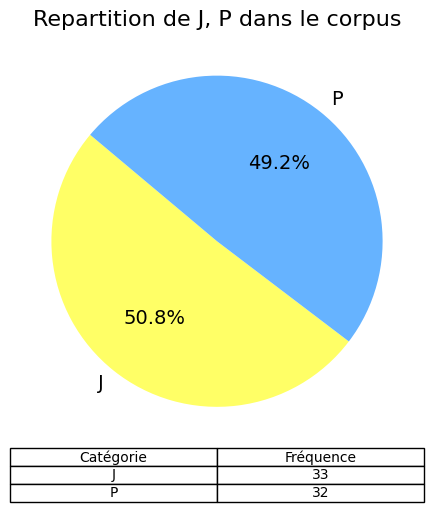

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def count_and_plot_pie_charts_with_tables(csv_filename, column_number):
    df = pd.read_csv(csv_filename)

    col_name = df.columns[column_number]

    df[f'{col_name}_1'] = df[col_name].str[0]
    df[f'{col_name}_2'] = df[col_name].str[1]
    df[f'{col_name}_3'] = df[col_name].str[2]
    df[f'{col_name}_4'] = df[col_name].str[3]

    for i in range(1, 5):
        part_name = f'{col_name}_{i}'
        value_counts = df[part_name].value_counts()

        clear_yellow = '#FFFF66'
        clear_blue = '#66B3FF'
        colors = [clear_yellow, clear_blue]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                textprops={'fontsize': 14})  

        values = ', '.join(value_counts.index[:2]) 
        ax.set_title(f"Repartition de {values} dans le corpus", fontsize=16)

        table_data = [(value, count) for value, count in zip(value_counts.index, value_counts)]
        table = plt.table(cellText=table_data, cellLoc='center', loc='bottom', colLabels=['Catégorie', 'Fréquence'])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.2)

        plt.subplots_adjust(top=0.8) 

        plt.show()

count_and_plot_pie_charts_with_tables('annote_yidi.csv', 0)


# 3. Accuracy

In [74]:
import pandas as pd
def accuracy_ei_ponderer(csv_filename):
    
    I=38
    E=27


    df = pd.read_csv(csv_filename)

    e_correct_annotations = 0
    i_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['EI']

        if 'E' in GOLD and 'E' in test:
            e_correct_annotations += 1
        elif 'I' in test and 'I' in GOLD:
            i_correct_annotations +=1


        e_accuracy = (e_correct_annotations / E) * 100
        i_accuracy= (i_correct_annotations/I)*100

        EI_ac_pond = (e_accuracy*E+i_accuracy*I)/(E+I)
    return EI_ac_pond

def accuracy_NS_ponderer(csv_filename):
    
    N=51
    S=14


    df = pd.read_csv(csv_filename)

    N_correct_annotations = 0
    S_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['NS']

        if 'N' in GOLD and 'N' in test:
            N_correct_annotations += 1
        elif 'S' in test and 'S' in GOLD:
            S_correct_annotations +=1


        S_accuracy = (S_correct_annotations / S) * 100
        N_accuracy= (N_correct_annotations/N)*100

        NS_ac_pond = (S_accuracy*S+N_accuracy*N)/(N+S)
    return NS_ac_pond

def accuracy_PJ_ponderer(csv_filename):
    
    P=32
    J=33


    df = pd.read_csv(csv_filename)

    P_correct_annotations = 0
    J_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['PJ']

        if 'P' in GOLD and 'P' in test:
            P_correct_annotations += 1
        elif 'J' in test and 'J' in GOLD:
            J_correct_annotations +=1


        P_accuracy = (P_correct_annotations / P) * 100
        J_accuracy= (J_correct_annotations/J)*100

        PJ_ac_pond = (P_accuracy*P+J_accuracy*J)/(P+J)
    return PJ_ac_pond

def accuracy_FT_ponderer(csv_filename):
    
    F=43
    T=22


    df = pd.read_csv(csv_filename)

    F_correct_annotations = 0
    T_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['FT']

        if 'F' in GOLD and 'F' in test:
            F_correct_annotations += 1
        elif 'T' in test and 'T' in GOLD:
            T_correct_annotations +=1


        F_accuracy = (F_correct_annotations / F) * 100
        T_accuracy= (T_correct_annotations/T)*100

        FT_ac_pond = (F_accuracy*F+T_accuracy*T)/(T+F)
    return FT_ac_pond


In [75]:
EI1=accuracy_ei_ponderer('annote_yidi.csv')
EI2=accuracy_ei_ponderer('annote_kexin.csv')
NS2=accuracy_NS_ponderer('annote_kexin.csv')
NS1=accuracy_NS_ponderer('annote_yidi.csv')
FT1=accuracy_FT_ponderer('annote_yidi.csv')
FT2=accuracy_FT_ponderer('annote_kexin.csv')
PJ1=accuracy_PJ_ponderer('annote_yidi.csv')
PJ2=accuracy_PJ_ponderer('annote_kexin.csv')



print(EI1,EI2,NS1,NS2)
print(FT1,FT2,PJ1,PJ2)

81.53846153846153 76.92307692307692 86.15384615384616 86.15384615384616
81.53846153846153 84.61538461538461 63.07692307692308 64.61538461538461


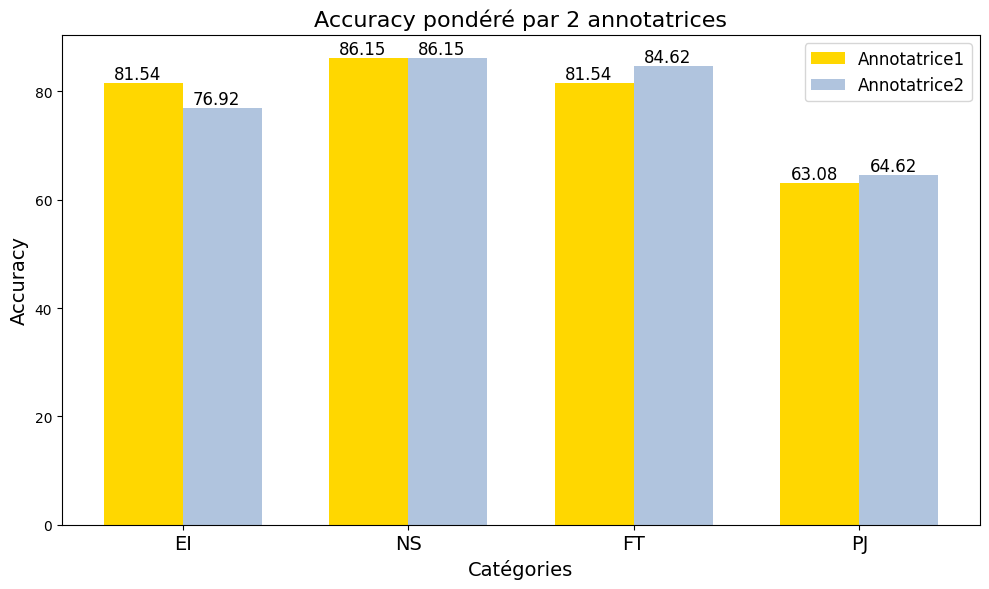

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values)
data = {
    'Category': ['EI', 'NS', 'FT', 'PJ'],
    'Annotatrice1': [EI1, NS1, FT1, PJ1],
    'Annotatrice2': [EI2, NS2, FT2, PJ2]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the x-axis labels
x_labels = df['Category']
x = np.arange(len(x_labels))  # X-axis values

# Set the data for plotting
width = 0.35  # Width of each bar

# Create subplots for each category
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size (width, height)

# Define colors for each dataset (yellow and lighter blue)
colors = ['gold', 'lightsteelblue']

# Create bars for each category and dataset with different colors
for i, col in enumerate(['Annotatrice1', 'Annotatrice2']):
    values = df[col]
    bar_positions = x + i * width  # Adjust bar positions for each dataset
    ax.bar(bar_positions, values, width, label=col, color=colors[i])

    # Add value numbers slightly to the left within each column's bar
    for j, value in enumerate(values):
        text_x = bar_positions[j] + width / 2 - 0.2 # Adjust the x-coordinate to move slightly to the left
        ax.text(text_x, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the x-ticks and labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_labels, fontsize=14)  # Increase the size of letters
ax.set_xlabel('Catégories', fontsize=14)  # Increase the size of the x-axis label
ax.set_ylabel('Accuracy', fontsize=14)  # Increase the size of the y-axis label

# Set the title and legend
ax.set_title('Accuracy pondéré par 2 annotatrices', fontsize=16)  # Increase the size of the title
ax.legend(fontsize=12)  # Increase the size of the legend

# Show the plot
plt.tight_layout()  # Ensure the plot fits within the figure size
plt.show()


# AIA

Probabilité d'accord (Po) : 0.8
Probabilité d'accord simultané (Pe) : 0.6698224852071006
kappa : 0.39426523297491045


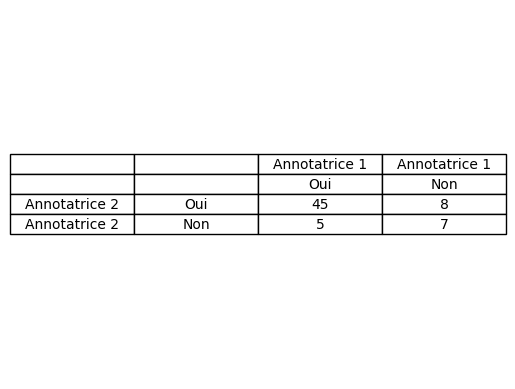

In [78]:
def AIA(test_colone):
    df1 = pd.read_csv('annote_yidi.csv')
    df2 = pd.read_csv('annote_kexin.csv')

    A,B,C,D=0,0,0,0
    for index, row1 in df1.iterrows():
        GOLD = row1['GOLD']
        test1 = row1[test_colone]

        row2 = df2.iloc[index] 
        test2 = row2[test_colone]

        if test1 in GOLD and test2 in GOLD :
            A+=1
        elif test1 in GOLD and test2 not in GOLD:
            B+=1
        elif test1 not in GOLD and test2 in GOLD :
            C+=1
        elif test1 not in GOLD and test2 not in GOLD :
            D+=1
    Po=(A+D)/(A+B+C+D)
    Oui= (A+C)/(A+B+C+D)*(A+B)/(A+B+C+D)
    Non=(B+D)/(A+B+C+D)*(C+D)/(A+B+C+D)
    Pe=Oui+Non
    Kappa = (Po-Pe)/(1-Pe)

    print(f"Probabilité d'accord (Po) : {Po}\nProbabilité d'accord simultané (Pe) : {Pe}\nkappa : {Kappa}")
    
    matrice = [['', '', 'Annotatrice 1', 'Annotatrice 1'],
           ['', '', 'Oui', 'Non',],
           ['Annotatrice 2', 'Oui', A, B],
           ['Annotatrice 2', 'Non', C, D]]

    fig, ax = plt.subplots()
    ax.axis('off')  # Masquez les axes

    # Créez un tableau pour afficher la matrice
    table = plt.table(cellText=matrice, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)

    # Affichez le plot
    plt.show()




(AIA('EI'))    

Probabilité d'accord (Po) : 0.8153846153846154
Probabilité d'accord simultané (Pe) : 0.7614201183431953
kappa : 0.22619047619047591


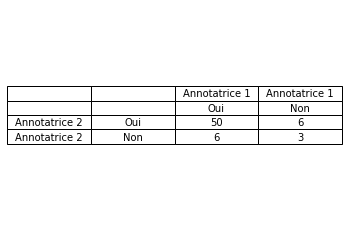

Probabilité d'accord (Po) : 0.7538461538461538
Probabilité d'accord simultané (Pe) : 0.7183431952662722
kappa : 0.12605042016806708


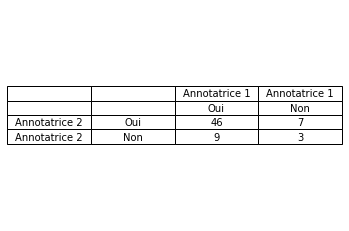

Probabilité d'accord (Po) : 0.6615384615384615
Probabilité d'accord simultané (Pe) : 0.5342011834319527
kappa : 0.27337398373983735


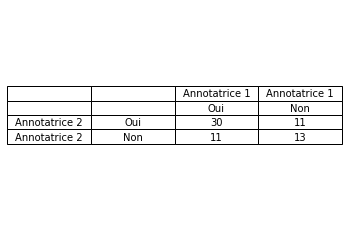

In [156]:
AIA('NS')
AIA('FT')
AIA('PJ')

Probabilité d'accord (Po): 0.80
Probabilité d'accord simultané (Pe): 0.67
Kappa: 0.39
Precision: 0.85
Recall: 0.90
F1 Score: 0.87


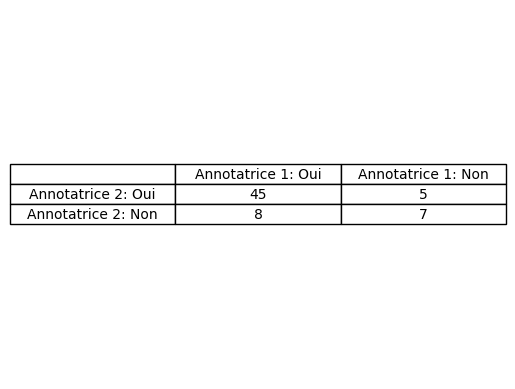

Probabilité d'accord (Po): 0.82
Probabilité d'accord simultané (Pe): 0.76
Kappa: 0.23
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


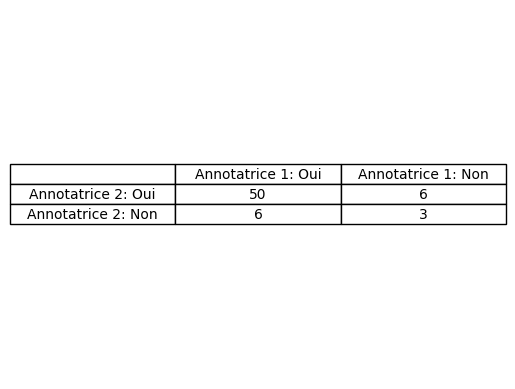

Probabilité d'accord (Po): 0.75
Probabilité d'accord simultané (Pe): 0.72
Kappa: 0.13
Precision: 0.87
Recall: 0.84
F1 Score: 0.85


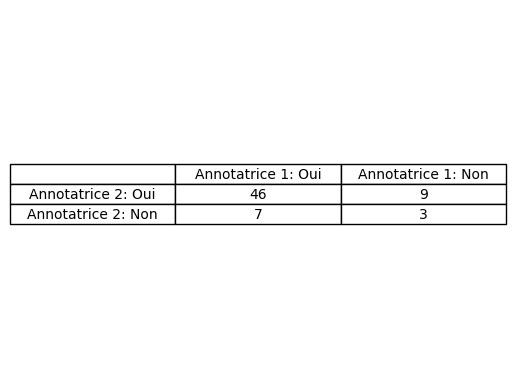

Probabilité d'accord (Po): 0.66
Probabilité d'accord simultané (Pe): 0.53
Kappa: 0.27
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


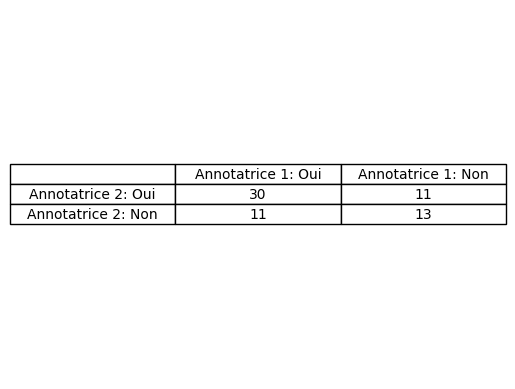

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

def AIA(test_colone):
    df1 = pd.read_csv('annote_yidi.csv')
    df2 = pd.read_csv('annote_kexin.csv')

    A, B, C, D = 0, 0, 0, 0
    for index, row in df1.iterrows():
        GOLD = row['GOLD']
        test1 = row[test_colone]
        test2 = df2.iloc[index][test_colone]

        if test1 in GOLD and test2 in GOLD:
            A += 1
        elif test1 in GOLD and test2 not in GOLD:
            B += 1
        elif test1 not in GOLD and test2 in GOLD:
            C += 1
        elif test1 not in GOLD and test2 not in GOLD:
            D += 1

    # Probabilité d'accord
    Po = (A + D) / (A + B + C + D)
    # Probabilité d'accord par chance
    Oui = (A + C) / (A + B + C + D) * (A + B) / (A + B + C + D)
    Non = (B + D) / (A + B + C + D) * (C + D) / (A + B + C + D)
    Pe = Oui + Non
    # Kappa Statistique
    kappa = (Po - Pe) / (1 - Pe) if (1 - Pe) != 0 else 0

    # Calcul de precision et recall
    precision = A / (A + B) if A + B != 0 else 0
    recall = A / (A + C) if A + C != 0 else 0
    # Calcul de F1 Score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"Probabilité d'accord (Po): {Po:.2f}")
    print(f"Probabilité d'accord simultané (Pe): {Pe:.2f}")
    print(f"Kappa: {kappa:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {F1:.2f}")

    # Création de la matrice de confusion
    matrice = [['', 'Annotatrice 1: Oui', 'Annotatrice 1: Non'],
               ['Annotatrice 2: Oui', A, C],
               ['Annotatrice 2: Non', B, D]]

    fig, ax = plt.subplots()
    ax.axis('off')
    table = plt.table(cellText=matrice, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)
    plt.show()

# Exemple d'appel de la fonction
AIA('EI')
AIA('NS')
AIA('FT')
AIA('PJ')


In [81]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Read the annotation data
df1 = pd.read_csv('annote_yidi.csv')  # Replace with your actual file path
df2 = pd.read_csv('annote_kexin.csv')  # Replace with your actual file path

# Function to extract individual categories from the GOLD standard
def extract_gold(df, index):
    return df['GOLD'].apply(lambda x: x[index])

# Function to calculate the metrics
def calculate_metrics(gold, predictions):
    precision = precision_score(gold, predictions, average='macro', zero_division=0)
    recall = recall_score(gold, predictions, average='macro', zero_division=0)
    f1 = f1_score(gold, predictions, average='macro', zero_division=0)
    return precision, recall, f1

# Initialize a dictionary to keep the scores
scores = {
    'Annotator1': {'precision': [], 'recall': [], 'f1': []},
    'Annotator2': {'precision': [], 'recall': [], 'f1': []},
}

# Calculate metrics for each category
for i, category in enumerate(['EI', 'NS', 'FT', 'PJ']):
    gold_standard = extract_gold(df1, i)  # Assuming df1 contains the GOLD standard
    annotator1_predictions = df1[category]
    annotator2_predictions = df2[category]

    p1, r1, f1 = calculate_metrics(gold_standard, annotator1_predictions)
    p2, r2, f2 = calculate_metrics(gold_standard, annotator2_predictions)
    
    scores['Annotator1']['precision'].append(p1)
    scores['Annotator1']['recall'].append(r1)
    scores['Annotator1']['f1'].append(f1)
    
    scores['Annotator2']['precision'].append(p2)
    scores['Annotator2']['recall'].append(r2)
    scores['Annotator2']['f1'].append(f2)

# Output the average scores for each annotator
for annotator, metrics in scores.items():
    avg_precision = sum(metrics['precision']) / len(metrics['precision'])
    avg_recall = sum(metrics['recall']) / len(metrics['recall'])
    avg_f1 = sum(metrics['f1']) / len(metrics['f1'])
    
    print(f"{annotator} - Average Precision: {avg_precision:.2f}")
    print(f"{annotator} - Average Recall: {avg_recall:.2f}")
    print(f"{annotator} - Average F1: {avg_f1:.2f}")


Annotator1 - Average Precision: 0.77
Annotator1 - Average Recall: 0.75
Annotator1 - Average F1: 0.75
Annotator2 - Average Precision: 0.74
Annotator2 - Average Recall: 0.69
Annotator2 - Average F1: 0.69


### Questionnaire_précision, rappel, F-mesure

In [84]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


df_annot1 = pd.read_csv('annote_yidi.csv')  
df_annot2 = pd.read_csv('annote_kexin.csv')  

def extract_from_gold(gold, position):
    return gold.apply(lambda x: x[position])

def compute_metrics(gold, annotations):
    precision = precision_score(gold, annotations, average='macro', zero_division=0)
    recall = recall_score(gold, annotations, average='macro', zero_division=0)
    f1 = f1_score(gold, annotations, average='macro', zero_division=0)
    return precision, recall, f1

average_metrics = {'precision': [], 'recall': [], 'f1': []}


for i, dimension in enumerate(['EI', 'NS', 'FT', 'PJ']):
    
    gold_standard = extract_from_gold(df_annot1['GOLD'], i)
    
    # Calcul des indicateurs pour chaque annotateur
    precision1, recall1, f11 = compute_metrics(gold_standard, df_annot1[dimension])
    precision2, recall2, f12 = compute_metrics(gold_standard, df_annot2[dimension])
    
    # indicateur moyen
    average_metrics['precision'].append((precision1 + precision2) / 2)
    average_metrics['recall'].append((recall1 + recall2) / 2)
    average_metrics['f1'].append((f11 + f12) / 2)

# P,R,F de chaque dimention
for i, dimension in enumerate(['EI', 'NS', 'FT', 'PJ']):
    print(f"{dimension} - Precision: {average_metrics['precision'][i]:.2f}")
    print(f"{dimension} - Recall: {average_metrics['recall'][i]:.2f}")
    print(f"{dimension} - F1 Score: {average_metrics['f1'][i]:.2f}")


EI - Precision: 0.84
EI - Recall: 0.76
EI - F1 Score: 0.76
NS - Precision: 0.80
NS - Recall: 0.80
NS - F1 Score: 0.79
FT - Precision: 0.81
FT - Recall: 0.81
FT - F1 Score: 0.81
PJ - Precision: 0.57
PJ - Recall: 0.53
PJ - F1 Score: 0.51


### Twitter_précision, rappel, F_mesure 

In [86]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


df_annot1 = pd.read_csv('yidi_twitter.csv')  
df_annot2 = pd.read_csv('kexin_twitter.csv') 


def extract_from_gold(gold, position):
    return gold.apply(lambda x: x[position])

def compute_metrics(gold, annotations):
    precision = precision_score(gold, annotations, average='macro', zero_division=0)
    recall = recall_score(gold, annotations, average='macro', zero_division=0)
    f1 = f1_score(gold, annotations, average='macro', zero_division=0)
    return precision, recall, f1

average_metrics = {'precision': [], 'recall': [], 'f1': []}


for i, dimension in enumerate(['EI', 'NS', 'FT', 'JP']):
 
    gold_standard = extract_from_gold(df_annot1['GOLD'], i)
    

    precision1, recall1, f11 = compute_metrics(gold_standard, df_annot1[dimension])
    precision2, recall2, f12 = compute_metrics(gold_standard, df_annot2[dimension])
    

    average_metrics['precision'].append((precision1 + precision2) / 2)
    average_metrics['recall'].append((recall1 + recall2) / 2)
    average_metrics['f1'].append((f11 + f12) / 2)


for i, dimension in enumerate(['EI', 'NS', 'FT', 'PJ']):
    print(f"{dimension} - Precision: {average_metrics['precision'][i]:.2f}")
    print(f"{dimension} - Recall: {average_metrics['recall'][i]:.2f}")
    print(f"{dimension} - F1 Score: {average_metrics['f1'][i]:.2f}")


EI - Precision: 0.77
EI - Recall: 0.77
EI - F1 Score: 0.77
NS - Precision: 0.81
NS - Recall: 0.80
NS - F1 Score: 0.80
FT - Precision: 0.68
FT - Recall: 0.66
FT - F1 Score: 0.66
PJ - Precision: 0.61
PJ - Recall: 0.59
PJ - F1 Score: 0.58


# Preparation for train set

In [4]:
import pandas as pd
import os

df = pd.read_csv('annote_yidi.csv')

os.makedirs('E', exist_ok=True)
os.makedirs('I', exist_ok=True)

for index, row in df.iterrows():
    col_A = row['GOLD']
    col_F = row['vacances']
    col_G = row['passe-temps']

    if 'E' in col_A:

        target_directory = 'E' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    if 'I'in col_A:

        target_directory = 'I' 
        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    


# Train test

In [3]:
import spacy

# Load the French language model
nlp = spacy.load("fr_core_news_md")


/opt/homebrew/lib/python3.11/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/opt/homebrew/lib/python3.11/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]


## Lemmatization

In [6]:
import os
import spacy

nlp = spacy.load("fr_core_news_md")

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

input_directory = "MBTI_CATEGORIE/EI/I"

output_directory = "MBTI_CATEGORIE/EI/I_cleaned"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, filename)

        with open(input_path, "r", encoding="utf-8") as input_file:
            text = input_file.read()
            lemmatized_text = lemmatize_text(text)

        with open(output_path, "w", encoding="utf-8") as output_file:
            output_file.write(lemmatized_text)

print("Lemmatization of text files completed.")


Lemmatization of text files completed.


## Stop words

In [2]:
import os
import re

def nettoyage_and_rewrite_directory(directory_path):
    # Load the list of stop words
    with open('stop-w_fr.txt', 'r', encoding='utf-8') as stop_words_file:
        stop_words = set(stop_words_file.read().splitlines())

    # Define a pattern to extract words (at least 2 characters) with accented characters
    pattern = r'[\wÀ-ÖØ-öø-ÿ]+'

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            
            if file_path.endswith(".txt"):
                # Read the file and initialize the result string
                with open(file_path, 'r', encoding='utf-8') as input_file:
                    text = input_file.read()

                cleaned_text = ""

                # Tokenize the text and process each word
                for word in re.findall(pattern, text.lower()):
                    # Check if the word is not a stop word
                    if word not in stop_words:
                        cleaned_text += word + ' '

                # Write the cleaned text back to the same file
                with open(file_path, 'w', encoding='utf-8') as output_file:
                    output_file.write(cleaned_text)

# Example usage to clean and rewrite files in the 'E' directory
directory_path = 'MBTI_CATEGORIE/EI/I_cleaned'
nettoyage_and_rewrite_directory(directory_path)


FileNotFoundError: [Errno 2] No such file or directory: 'stop-w_fr.txt'

In [154]:
import pandas as pd
import os

def create_csv_from_directory(directory_path, label, output_filename):
    data = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as input_file:
                    response = input_file.read().strip()
                data.append([response, label])
    
    df = pd.DataFrame(data, columns=["reponse", "label"])
    
    df.to_csv(output_filename, mode='a', index=False, header=True)

# Create separate CSV files for the 'EI' and 'I' directories
create_csv_from_directory("MBTI_CATEGORIE/NS/N_cleaned", 1, "outputNS01.csv")
create_csv_from_directory("MBTI_CATEGORIE/NS/S_cleaned", 0, "outputNS01.csv")


In [1]:
import pandas as pd
df = pd.read_csv('outputJP.csv',encoding="utf-8")

In [2]:
df.head()

,reponse,label
0,sortir avec un ami qui former un équipe bien é...,1
1,j’ aimer bien trouver un lieu pas très populai...,1
2,je aimer bien visiter le parc et musée . ce êt...,1
3,si je avoir plus ou moins un mois pour le vaca...,1
4,"voyage ou rester chez moi ！ \n film , lorsque ...",1


In [3]:
### split data to negatif and positif comment
P=df[df['label']==0]['reponse']
J=df[df['label']==1]['reponse']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 4))

In [5]:
X_P = vectorizer.fit_transform(P)
print(vectorizer.get_feature_names_out())

print(X_P.shape)


['180 degré' '180 degré être' '180 degré être pile' ... 'île couper'
 'île couper de' 'île couper de monde']
(33, 9734)


In [6]:
P=pd.DataFrame(X_P.toarray(),columns=vectorizer.get_feature_names_out())
P

,180 degré,180 degré être,180 degré être pile,abuser pas,abuser pas enfin,abuser pas enfin bref,accompagner pour,accompagner pour finir,accompagner pour finir je,accomplissement lorsque,...,être vraiment un passion,être écouter,être écouter de,être écouter de le,être également,être également important,être également important pour,île couper,île couper de,île couper de monde
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.040482,0.040482,0.040482,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
X_J = vectorizer.fit_transform(J)
print(vectorizer.get_feature_names_out())

print(X_J.shape)

['100 pourcent' '100 pourcent car' '100 pourcent car être' ...
 'être épuiser' 'être épuiser par' 'être épuiser par ce']
(40, 9270)


In [8]:
J=pd.DataFrame(X_J.toarray(),columns=vectorizer.get_feature_names_out())
J

,100 pourcent,100 pourcent car,100 pourcent car être,2016 avoir,2016 avoir commencer,2016 avoir commencer avec,absolu pas,absolu pas de,absolu pas de tâche,absolument différent,...,être vraiment être déconnecter,être véritablement,être véritablement pour,être véritablement pour moi,être épanouissant,être épanouissant et,être épanouissant et que,être épuiser,être épuiser par,être épuiser par ce
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
J.max(axis=1)

0     0.194928
1     0.145489
2     0.090085
3     0.121546
4     0.105488
5     0.128894
6     0.166667
7     0.133164
8     0.129494
9     0.158841
10    0.065916
11    0.153346
12    0.124134
13    0.102377
14    0.114149
15    0.101450
16    0.100963
17    0.111725
18    0.138385
19    0.095206
20    0.111674
21    0.104827
22    0.134714
23    0.111150
24    0.111001
25    0.126896
26    0.142973
27    0.105946
28    0.105589
29    0.112724
30    0.133598
31    0.104133
32    0.054009
33    0.083362
34    0.135227
35    0.168837
36    0.314569
37    0.105520
38    0.123433
39    0.105647
dtype: float64

In [10]:
### avec toutes les données
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(df['reponse'])
print(vectorizer.get_feature_names_out())

print(X.shape)

['100' '180' '2016' ... 'éviter' 'être' 'île']
(73, 1221)


In [11]:
Mat=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
Mat

,100,180,2016,absolu,absolument,absorber,abuser,accablant,accompagner,accomplissement,...,étude,étudiant,étudier,été,évacuer,évader,évidemment,éviter,être,île
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.199009,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.069758,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072118,0.082089,0.0,0.0,0.0,0.0,0.147687,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.039965,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.086861,0.0


In [12]:
Mat.max(axis=1)

0     0.379251
1     0.300905
2     0.308241
3     0.256702
4     0.322810
        ...   
68    0.326294
69    0.409615
70    0.272467
71    0.317608
72    0.378288
Length: 73, dtype: float64

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
res=pd.DataFrame(cosine_similarity(Mat,Mat))
res

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,1.000000,0.081606,0.203418,0.243757,0.113015,0.169760,0.036250,0.180068,0.242512,0.205070,...,0.266148,0.103153,0.215538,0.002010,0.291065,0.307502,0.087546,0.211642,0.149480,0.278890
1,0.081606,1.000000,0.140720,0.109411,0.052713,0.057147,0.088502,0.116209,0.144135,0.165293,...,0.150139,0.065614,0.154530,0.000000,0.214195,0.138642,0.026454,0.158825,0.086208,0.112140
2,0.203418,0.140720,1.000000,0.261457,0.107885,0.117033,0.093774,0.167392,0.216343,0.138522,...,0.224914,0.091713,0.212570,0.004933,0.296696,0.264323,0.059227,0.273579,0.175998,0.232712
3,0.243757,0.109411,0.261457,1.000000,0.209181,0.135959,0.024445,0.228701,0.249045,0.230119,...,0.320771,0.118931,0.297286,0.003448,0.285625,0.348264,0.098122,0.285979,0.162926,0.370874
4,0.113015,0.052713,0.107885,0.209181,1.000000,0.103432,0.005552,0.167432,0.163366,0.110442,...,0.190889,0.096389,0.233994,0.000000,0.221207,0.188446,0.097327,0.186293,0.094366,0.227798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.307502,0.138642,0.264323,0.348264,0.188446,0.189536,0.013610,0.263635,0.311346,0.271167,...,0.337238,0.155918,0.379750,0.008702,0.331621,1.000000,0.139094,0.332102,0.210945,0.402824
69,0.087546,0.026454,0.059227,0.098122,0.097327,0.048598,0.021222,0.069675,0.102055,0.082118,...,0.116919,0.062986,0.084435,0.000000,0.076144,0.139094,1.000000,0.089594,0.042707,0.128694
70,0.211642,0.158825,0.273579,0.285979,0.186293,0.167864,0.054618,0.295844,0.349744,0.249979,...,0.304702,0.174331,0.323857,0.000000,0.299318,0.332102,0.089594,1.000000,0.191018,0.380477
71,0.149480,0.086208,0.175998,0.162926,0.094366,0.064904,0.018944,0.098891,0.173308,0.132613,...,0.205322,0.080115,0.224019,0.000000,0.192599,0.210945,0.042707,0.191018,1.000000,0.208205


# Word2vec

In [14]:
df.shape

(73, 2)

In [15]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in df['reponse'] for sent in nltk.sent_tokenize(sent_tok)]

In [16]:
list_sents

[['sortir',
  'avec',
  'un',
  'ami',
  'qui',
  'former',
  'un',
  'équipe',
  'bien',
  'équilibré',
  '.'],
 ['au',
  'sein',
  'de',
  'l',
  '’',
  'équipe',
  ',',
  'il',
  'y',
  'avoir',
  'celui',
  'qui',
  'conduire',
  ',',
  'celui',
  'qui',
  'cuisine',
  ',',
  'celui',
  'qui',
  'organiser',
  ',',
  'et',
  'celui',
  'qui',
  'être',
  'empathique',
  'et',
  'qui',
  'pouvoir',
  'agir',
  'en',
  'cas',
  'de',
  'dispute',
  '.'],
 ['on',
  'planifier',
  'le',
  'activité',
  'principal',
  'de',
  'chaque',
  'jour',
  'tout',
  'en',
  'être',
  'flexible',
  'sur',
  'le',
  'détail',
  '.'],
 ['rester',
  'chez',
  'moi',
  'quand',
  'je',
  'être',
  'fatiguer',
  ',',
  'sinon',
  'me',
  'faire',
  'de',
  'nouveau',
  'ami',
  ',',
  'essayer',
  'de',
  'nouveau',
  'chose',
  ',',
  'voyager',
  'dans',
  'de',
  'différent',
  'endroit',
  ',',
  'pour',
  'découvrir',
  'le',
  'monde',
  'et',
  'moi',
  '-',
  'même',
  '.'],
 ['ici',
  'je',
 

In [17]:
import multiprocessing
cores = multiprocessing.cpu_count() # compte le nombre de cœurs (core) dans l'ordinateur pour l'entrainement

In [18]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=2,
                          vector_size=300,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=cores-1)

In [19]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [21]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [22]:
w2v_model.init_sims(replace=True)

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_13354/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [23]:
### most similarity
w2v_model.wv.most_similar(positive=["lire"])

[('dans', 0.9997169375419617),
 ('découvrir', 0.9997166991233826),
 ('ou', 0.9997161030769348),
 ('jouer', 0.999713122844696),
 ('moi', 0.9997121691703796),
 ('vacance', 0.999711275100708),
 ('où', 0.9997104406356812),
 ('à', 0.9997066259384155),
 ('beaucoup', 0.9997063279151917),
 ('chez', 0.999701738357544)]

In [24]:
### similarity
w2v_model.wv.similarity("aimer", 'sortir')

0.9997043

In [25]:
### getting a word vector
w2v_model.wv['lire']

array([-0.04020391,  0.07028039,  0.00976549, -0.02692969,  0.00074386,
       -0.05828265,  0.03619989,  0.14590105,  0.02551803, -0.02775838,
        0.07796463, -0.02431103, -0.01567129,  0.05845783, -0.01467298,
       -0.08493564,  0.06999417, -0.01519158,  0.01639705, -0.06844148,
       -0.00868359,  0.01385327,  0.02518682,  0.06100971, -0.00615961,
       -0.01919664, -0.13351087, -0.00027125, -0.09240065, -0.10889655,
       -0.00545027, -0.00833871,  0.05675641,  0.00154407, -0.00163965,
        0.05025812,  0.05297917, -0.03491178, -0.03931737,  0.03732158,
       -0.04474637,  0.00417418, -0.01208985, -0.02251571,  0.03935087,
        0.11391892,  0.05156384,  0.05938566,  0.03316921,  0.07663479,
        0.03121775,  0.01683231, -0.04719608,  0.04267837,  0.02529756,
        0.03156218,  0.05767946,  0.00426497,  0.00946618,  0.01649761,
       -0.02423177, -0.01444275,  0.002246  ,  0.0591594 , -0.04633478,
        0.05309529, -0.00218532,  0.09137318, -0.0749867 , -0.00

In [26]:
import torch
from transformers import CamembertTokenizer,CamembertModel

tokenizer = CamembertTokenizer.from_pretrained('camembert/camembert-large')
model = CamembertModel.from_pretrained('camembert/camembert-large',output_hidden_states=True)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
# Extract the last layer's features
line = "J'aime le camembert !"
input_ids = tokenizer.encode(line, return_tensors='pt') 
outputs = model(input_ids)

In [28]:
input_ids.shape

torch.Size([1, 10])

In [29]:
outputs[2][-4:]

(tensor([[[ 0.1587,  0.3786,  0.0825,  ...,  0.1899,  0.0925, -0.2983],
          [ 0.4463, -0.0386, -0.4613,  ...,  0.3045, -0.0562, -0.3966],
          [ 0.0162,  0.4548,  0.4028,  ...,  0.3415,  0.1764, -0.1404],
          ...,
          [ 0.3938,  0.3159, -0.2385,  ...,  0.3451,  0.3870,  0.3684],
          [ 0.1471,  0.0064,  0.3660,  ...,  0.2415, -0.3712,  0.0727],
          [-0.0252, -0.0246,  0.0434,  ...,  0.0147, -0.0142, -0.0358]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-0.0578,  0.4780,  0.3756,  ...,  0.2118,  0.1431,  0.1120],
          [ 0.2987, -0.2125, -0.5713,  ...,  0.2652, -0.0030, -0.1967],
          [ 0.3370,  0.4695,  0.3492,  ...,  0.1969,  0.0118, -0.1037],
          ...,
          [ 0.3618,  0.3188, -0.2318,  ...,  0.1946,  0.2531,  0.4184],
          [ 0.2292, -0.0217,  0.1935,  ...,  0.1682, -0.2649,  0.2151],
          [-0.0282, -0.0402,  0.0247,  ...,  0.0333,  0.0277, -0.0330]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-

In [30]:
import pandas as pd
import numpy as np

l=[]
for i in range(-1,-5,-1):
    l.append(pd.DataFrame(np.mean(outputs[2][i].squeeze(0).detach().numpy(),axis=0)).T)
    
pd.concat(l,ignore_index=True).mean(axis=0)

0       0.078970
1       0.036869
2       0.041912
3       0.090438
4       0.144143
          ...   
1019   -0.028084
1020    0.049764
1021    0.029793
1022    0.010036
1023    0.017181
Length: 1024, dtype: float32

# PARTIE 3

In [31]:
import pandas as pd
df = pd.read_csv('outputJP.csv',encoding="utf-8")

In [32]:
from sklearn.model_selection import train_test_split

reviews = df['reponse']
labels = df['label']

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, random_state = 42, test_size = 0.3)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_final = vectorizer.fit_transform(X_train)

print(X_train_final.shape)

(51, 996)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [35]:
tfid_predictions = text_clf.predict(X_test)

In [36]:
text_clf.score(X_test, y_test)

0.5909090909090909

## Word2vec

In [37]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in X_train for sent in nltk.sent_tokenize(sent_tok)]

In [38]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=12,
                          vector_size=80,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=8)

In [39]:
w2v_model.corpus_count

213

In [40]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [41]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [42]:
w2v_model.init_sims(replace=True)

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_13354/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [43]:
import numpy

### function to get vector
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

### function to sum vector
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

### function to get feature
def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

In [44]:
wv_train_feat = word2vec_features(X_train, w2v_model)
wv_train_feat.shape

(51, 80)

In [45]:
from sklearn.linear_model import LogisticRegression
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(max_iter=1000)

In [46]:
### featurisation du data
wv_test_feat = word2vec_features(X_test, w2v_model)

In [47]:
### prediction
w2v_predictions = clfwv.predict(wv_test_feat)

In [48]:
### score
clfwv.score(wv_test_feat, y_test)

0.5454545454545454

## Camenbert

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [50]:
# load model, tokenizer and weights
camembert, tokenizer, weights = (ppb.CamembertModel, ppb.CamembertTokenizer, 'camembert-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer.from_pretrained(weights)
model = camembert.from_pretrained(weights)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [52]:
# see if there are length > 512
max_len = 0
for i,sent in enumerate(reviews):
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    if len(input_ids) > 512:
        print("annoying review at", i,"with length",
              len(input_ids))
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  366


In [53]:
tokenized = reviews.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
for i, tokens in enumerate(tokenized):
    print(f"Length of sentence {i}: {len(tokens)}")

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape




Length of sentence 0: 195
Length of sentence 1: 57
Length of sentence 2: 56
Length of sentence 3: 102
Length of sentence 4: 51
Length of sentence 5: 75
Length of sentence 6: 27
Length of sentence 7: 120
Length of sentence 8: 152
Length of sentence 9: 60
Length of sentence 10: 147
Length of sentence 11: 97
Length of sentence 12: 117
Length of sentence 13: 109
Length of sentence 14: 136
Length of sentence 15: 86
Length of sentence 16: 149
Length of sentence 17: 147
Length of sentence 18: 124
Length of sentence 19: 155
Length of sentence 20: 175
Length of sentence 21: 124
Length of sentence 22: 113
Length of sentence 23: 138
Length of sentence 24: 186
Length of sentence 25: 136
Length of sentence 26: 103
Length of sentence 27: 191
Length of sentence 28: 182
Length of sentence 29: 282
Length of sentence 30: 183
Length of sentence 31: 135
Length of sentence 32: 180
Length of sentence 33: 289
Length of sentence 34: 108
Length of sentence 35: 134
Length of sentence 36: 42
Length of sentence 3

(73, 366)

In [54]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(73, 366)

In [55]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [56]:
features = last_hidden_states[0][:,0,:].numpy()
labels = labels
labels

0     1
1     1
2     1
3     1
4     1
     ..
68    0
69    0
70    0
71    0
72    0
Name: label, Length: 73, dtype: int64

In [57]:
### split data avec les nouvelles features
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [58]:
# Grid search pour le choix du bon parametrage
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.6127272727272727


In [59]:
lr_clf = LogisticRegression(C=grid_search.best_params_['C'])
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=5.263252631578947)

In [60]:
camembert_predictions = lr_clf.predict(test_features)

In [61]:
### score
lr_clf.score(test_features, test_labels)

0.3684210526315789

## 2. Analyse des performences des modèles

In [62]:
from sklearn import metrics

In [63]:
print("Accuracy:", metrics.accuracy_score(y_test, tfid_predictions))
print("Precision:", metrics.precision_score(y_test, tfid_predictions))
print("Recall:", metrics.recall_score(y_test, tfid_predictions))
print("F1-score:", metrics.f1_score(y_test, tfid_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, tfid_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, tfid_predictions))
print(metrics.classification_report(y_test, tfid_predictions))

Accuracy: 0.5909090909090909
Precision: 0.7272727272727273
Recall: 0.5714285714285714
F1-score: 0.64
MCC: 0.18898223650461363
Confusion matrix: [[5 3]
 [6 8]]
              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.73      0.57      0.64        14

    accuracy                           0.59        22
   macro avg       0.59      0.60      0.58        22
weighted avg       0.63      0.59      0.60        22



In [64]:
print("Accuracy:", metrics.accuracy_score(y_test, w2v_predictions))
print("Precision:", metrics.precision_score(y_test, w2v_predictions))
print("Recall:", metrics.recall_score(y_test, w2v_predictions))
print("F1-score:", metrics.f1_score(y_test, w2v_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, w2v_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, w2v_predictions))
print(metrics.classification_report(y_test, w2v_predictions))

Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.5714285714285714
F1-score: 0.6153846153846153
MCC: 0.06900655593423542
Confusion matrix: [[4 4]
 [6 8]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.67      0.57      0.62        14

    accuracy                           0.55        22
   macro avg       0.53      0.54      0.53        22
weighted avg       0.57      0.55      0.55        22



In [65]:
print("Accuracy:", metrics.accuracy_score(test_labels, camembert_predictions))
print("Precision:", metrics.precision_score(test_labels, camembert_predictions))
print("Recall:", metrics.recall_score(test_labels, camembert_predictions))
print("F1-score:", metrics.f1_score(test_labels, camembert_predictions))
print("MCC:", metrics.matthews_corrcoef(test_labels, camembert_predictions))
print("Confusion matrix:", metrics.confusion_matrix(test_labels, camembert_predictions))
print(metrics.classification_report(test_labels, camembert_predictions))

Accuracy: 0.3684210526315789
Precision: 0.35294117647058826
Recall: 0.8571428571428571
F1-score: 0.5
MCC: -0.09356014857063996
Confusion matrix: [[ 1 11]
 [ 1  6]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.35      0.86      0.50         7

    accuracy                           0.37        19
   macro avg       0.43      0.47      0.32        19
weighted avg       0.45      0.37      0.27        19



### diagramme de corpus 

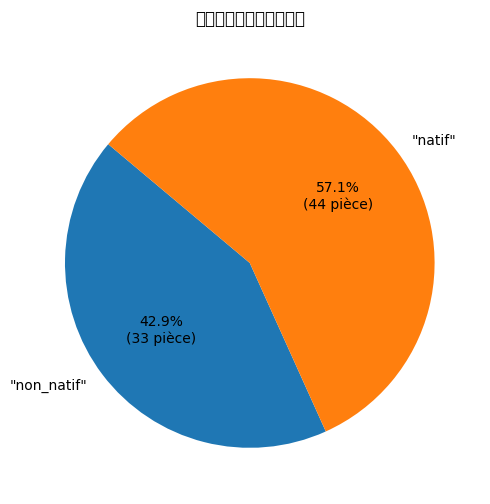

In [89]:
import matplotlib.pyplot as plt


data_sources = ['"non_natif"', '"natif"']
quantities = [33, 44]

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d} pièce)".format(pct, absolute)

# création du diagramme
plt.figure(figsize=(8, 6))  
plt.pie(quantities, labels=data_sources, autopct=lambda pct: func(pct, quantities), startangle=140)

# titre
plt.title('Proportion de données de sources différentes')

plt.show()
